In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

### Membaca data yang analisisnya perlu dilakukan

In [41]:
data = pd.read_csv('gamesBersih.csv')
data.head()

,Unnamed: 0,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,black,draw,white
0,0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0.0,0.0,1.0
1,1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1.0,0.0,0.0
2,2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0.0,0.0,1.0
3,3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,0.0,0.0,1.0
4,4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0.0,0.0,1.0


### Bentuk Data

In [42]:
data.shape

(19629, 20)

### Data Info

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19629 entries, 0 to 19628
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      19629 non-null  int64  
 1   id              19629 non-null  object 
 2   rated           19629 non-null  bool   
 3   created_at      19629 non-null  float64
 4   last_move_at    19629 non-null  float64
 5   turns           19629 non-null  int64  
 6   victory_status  19629 non-null  object 
 7   winner          19629 non-null  object 
 8   increment_code  19629 non-null  object 
 9   white_id        19629 non-null  object 
 10  white_rating    19629 non-null  int64  
 11  black_id        19629 non-null  object 
 12  black_rating    19629 non-null  int64  
 13  moves           19629 non-null  object 
 14  opening_eco     19629 non-null  object 
 15  opening_name    19629 non-null  object 
 16  opening_ply     19629 non-null  int64  
 17  black           19219 non-null 

### Deskripsi Data

In [44]:
data.describe()

,Unnamed: 0,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,black,draw,white
count,19629.000000,1.962900e+04,1.962900e+04,19629.000000,19629.000000,19629.000000,19629.000000,19219.000000,19219.000000,19219.000000
mean,9935.655102,1.483721e+12,1.483722e+12,60.458607,1596.090224,1588.324622,4.804422,0.454290,0.046829,0.498881
std,5792.775292,2.809364e+10,2.809353e+10,33.502852,290.165038,290.164447,2.792791,0.497919,0.211277,0.500012
min,0.000000,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000,0.000000,0.000000,0.000000
25%,4923.000000,1.477530e+12,1.477530e+12,37.000000,1400.000000,1393.000000,3.000000,0.000000,0.000000,0.000000
50%,9831.000000,1.495830e+12,1.495830e+12,55.000000,1567.000000,1562.000000,4.000000,0.000000,0.000000,0.000000
75%,15044.000000,1.503107e+12,1.503110e+12,79.000000,1791.000000,1783.000000,6.000000,1.000000,0.000000,1.000000
max,20057.000000,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000,1.000000,1.000000,1.000000


### Data Cleansing

In [45]:
data.isna().sum()

Unnamed: 0          0
id                  0
rated               0
created_at          0
last_move_at        0
turns               0
victory_status      0
winner              0
increment_code      0
white_id            0
white_rating        0
black_id            0
black_rating        0
moves               0
opening_eco         0
opening_name        0
opening_ply         0
black             410
draw              410
white             410
dtype: int64

In [46]:
data.duplicated().sum()

0

## 1.K-Means

In [47]:
dataset_model = KMeans(n_clusters=4)

In [48]:
point = data[['created_at','turns']]

In [49]:
dataset_model.fit(point)

KMeans(n_clusters=4)

In [50]:
labels = dataset_model.labels_

In [51]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
nilai_x = point['created_at']
nilai_y = point['turns']

In [53]:
data_centroid = dataset_model.cluster_centers_

In [54]:
data_centroid

array([[1.50153502e+12, 6.32841163e+01],
       [1.40781763e+12, 5.26250000e+01],
       [1.45484187e+12, 5.86200980e+01],
       [1.48405837e+12, 5.77310630e+01]])

In [55]:
centroid_xc = data_centroid[:,0]
centroid_yc = data_centroid[:,1]

## 2. Visualisasi

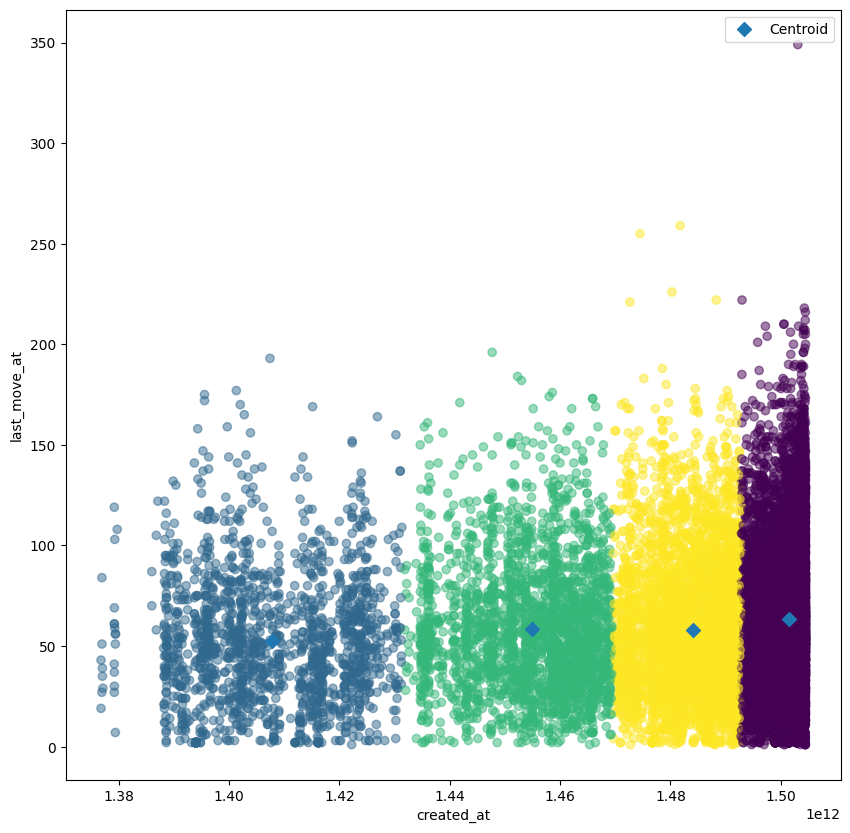

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(nilai_x, nilai_y, alpha=0.5, c=labels)
plt.scatter(centroid_xc, centroid_yc, marker='D', s=50, label='Centroid')
plt.xlabel('created_at')
plt.ylabel('last_move_at')
plt.legend()
plt.show()

In [57]:
cluster_range = range(1,8)
inertias = []
for k in cluster_range:
    dataset_model = KMeans(n_clusters=k)
    dataset_model.fit(point)
    inertias.append(dataset_model.inertia_)


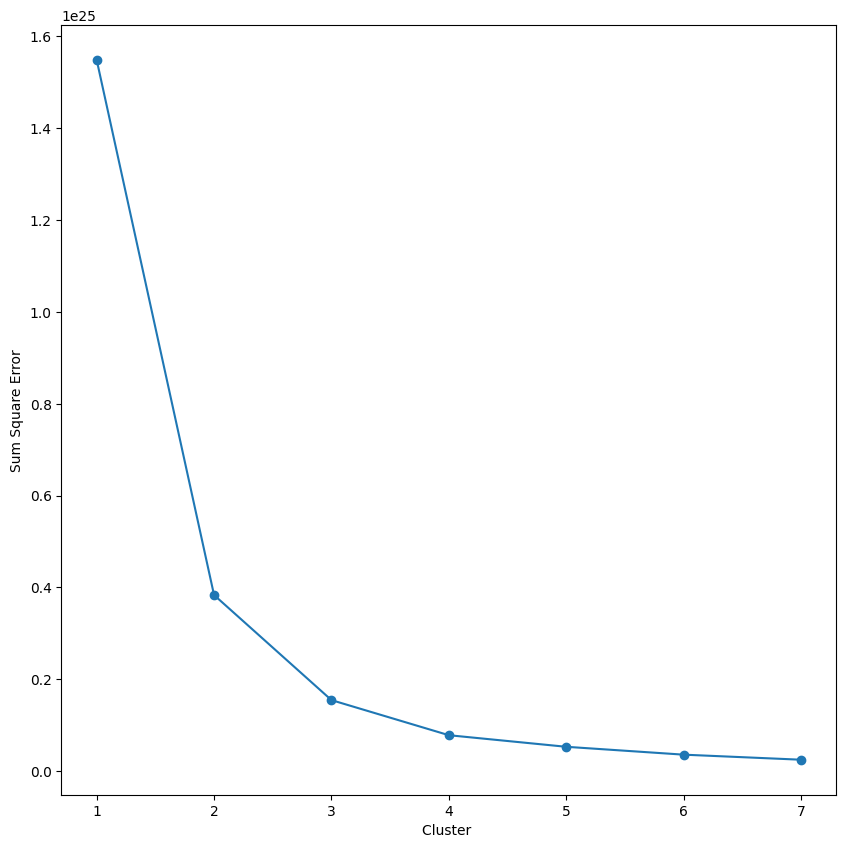

In [58]:
plt.figure(figsize=(10,10))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster ')
plt.ylabel('Sum Square Error')
plt.xticks(cluster_range)
plt.show()